In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
bitsl = [3.63, 7.12, 10.61, 13.91, 16.69, 19.97, 25.55, 29.13,
         32.07, 34.08, 36.65, 42.95, 43.38, 49.12, 52.22,
         53.47, 59.06, 60.12, 63.26]
norm = [11.75, 23.51, 36.51, 47.09, 58.85, 72.29, 82.45, 94.07,
        105.82, 117.59, 131.64, 141.17, 154.37, 166.89,
        177.64, 188.30, 201.75, 213.63, 224.61]
iters = [i*100 for i in range(1,20)]
df = pd.DataFrame([{"iters": k, "norm": i, "bitsl":j} for i,j,k in zip(bitsl, norm, iters)])

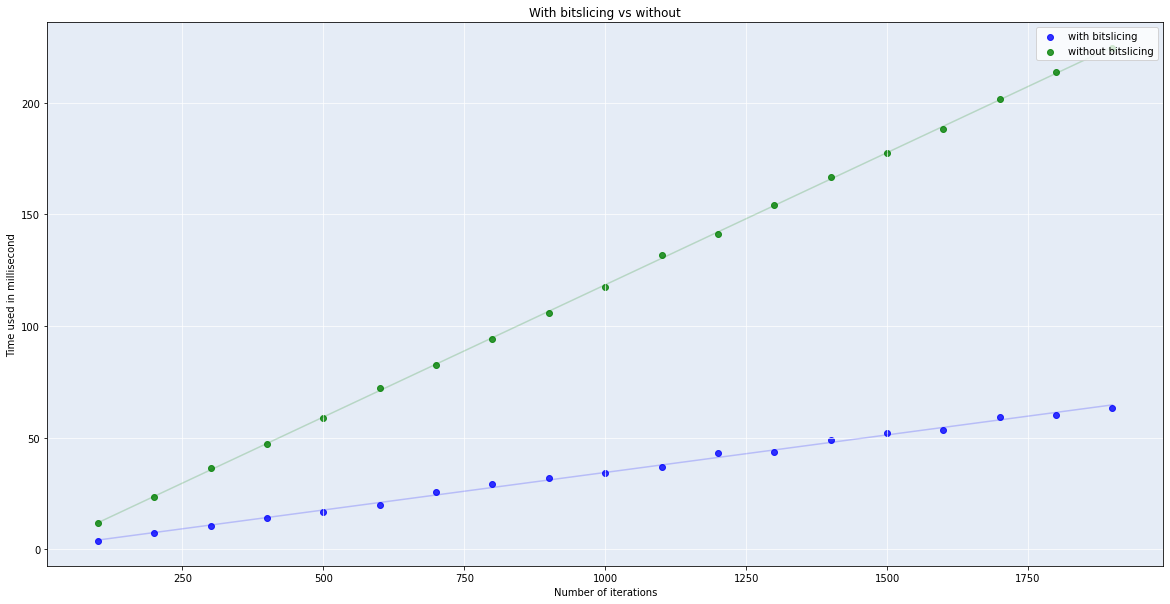

In [36]:
X1 = df.iloc[:, 0].values.reshape(-1, 1)
Y1 = df.iloc[:, 1].values.reshape(-1, 1)
linear_regressor1 = LinearRegression()
linear_regressor1.fit(X1, Y1)
Y_pred1 = linear_regressor1.predict(X1)

X2 = df.iloc[:, 0].values.reshape(-1, 1)
Y2 = df.iloc[:, 2].values.reshape(-1, 1)
linear_regressor2 = LinearRegression()
linear_regressor2.fit(X2, Y2)
Y_pred2 = linear_regressor2.predict(X2)

plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor('#e5ecf6')
plt.grid(True, linewidth=1.0, color='white', linestyle='-', alpha=0.7)
plt.scatter(iters, bitsl, color='blue', alpha=0.8, label='with bitslicing')
plt.scatter(iters, norm, color='green', alpha=0.8, label='without bitslicing')
plt.plot(X1, Y_pred1, color='blue', alpha=0.2)
plt.plot(X1, Y_pred2, color='green', alpha=0.2)
plt.legend(loc="upper right")
plt.title("With bitslicing vs without")
plt.xlabel("Number of iterations")
plt.ylabel("Time used in millisecond")
plt.show()

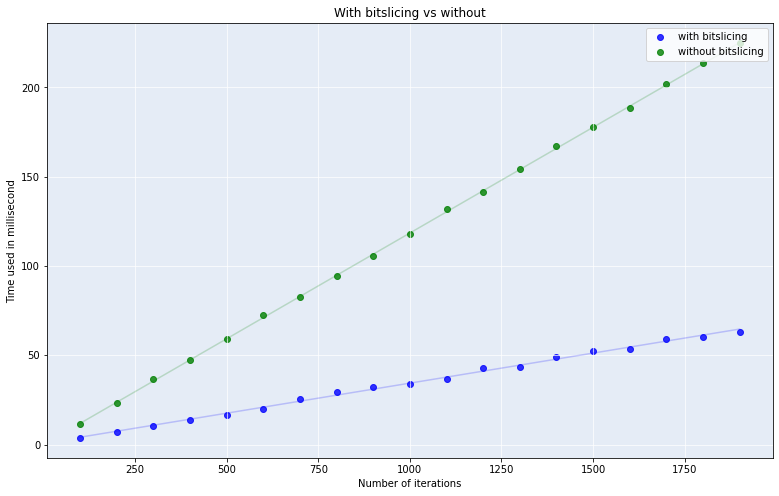

In [5]:
# smaller image
X1 = df.iloc[:, 0].values.reshape(-1, 1)
Y1 = df.iloc[:, 1].values.reshape(-1, 1)
linear_regressor1 = LinearRegression()
linear_regressor1.fit(X1, Y1)
Y_pred1 = linear_regressor1.predict(X1)

X2 = df.iloc[:, 0].values.reshape(-1, 1)
Y2 = df.iloc[:, 2].values.reshape(-1, 1)
linear_regressor2 = LinearRegression()
linear_regressor2.fit(X2, Y2)
Y_pred2 = linear_regressor2.predict(X2)

plt.figure(figsize=(13,8))
ax = plt.axes()
ax.set_facecolor('#e5ecf6')
plt.grid(True, linewidth=1.0, color='white', linestyle='-', alpha=0.7)
plt.scatter(iters, bitsl, color='blue', alpha=0.8, label='with bitslicing')
plt.scatter(iters, norm, color='green', alpha=0.8, label='without bitslicing')
plt.plot(X1, Y_pred1, color='blue', alpha=0.2)
plt.plot(X1, Y_pred2, color='green', alpha=0.2)
plt.legend(loc="upper right")
plt.title("With bitslicing vs without")
plt.xlabel("Number of iterations")
plt.ylabel("Time used in millisecond")
plt.show()

In [6]:
#get stats
df.describe()

,iters,norm,bitsl
count,19.000000,19.000000,19.000000
mean,1000.000000,34.367895,118.417368
std,562.731434,18.958297,66.631588
min,100.000000,3.630000,11.750000
25%,550.000000,18.330000,65.570000
50%,1000.000000,34.080000,117.590000
75%,1450.000000,50.670000,172.265000
max,1900.000000,63.260000,224.610000


In [11]:
# time per iteration
df['pern'] = df['norm'] / df['iters']
df['perb'] = df['bitsl'] / df['iters']

In [12]:
df.describe()

,iters,norm,bitsl,pern,perb
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1000.000000,34.367895,118.417368,0.034661,0.118429
std,562.731434,18.958297,66.631588,0.001186,0.001148
min,100.000000,3.630000,11.750000,0.033283,0.117500
25%,550.000000,18.330000,65.570000,0.033390,0.117616
50%,1000.000000,34.080000,117.590000,0.034775,0.117786
75%,1450.000000,50.670000,172.265000,0.035617,0.118715
max,1900.000000,63.260000,224.610000,0.036500,0.121700


In [13]:
df

,iters,norm,bitsl,pern,perb
0,100,3.63,11.75,0.036300,0.117500
1,200,7.12,23.51,0.035600,0.117550
2,300,10.61,36.51,0.035367,0.121700
3,400,13.91,47.09,0.034775,0.117725
4,500,16.69,58.85,0.033380,0.117700
5,600,19.97,72.29,0.033283,0.120483
6,700,25.55,82.45,0.036500,0.117786
7,800,29.13,94.07,0.036413,0.117587
8,900,32.07,105.82,0.035633,0.117578
9,1000,34.08,117.59,0.034080,0.117590
